In [1]:
import gym
from stable_baselines3 import PPO
from envs import ALGEnv, ALGDemoWrapper, AgentDemoWrapper, SokobanEnv
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.utils import set_random_seed
import os
from IPython.display import Image, display
import numpy as np
from demo_utils import evaluate_agents

# 1. Initiations

In [2]:
num_boxes = 1
dim_room = (7, 7)
train_mode = 'mlp'
alg_path = '../demo_checkpoints/alg_v1b_v'
agent_lb_path = '../demo_checkpoints/agent_v1b_0'
agent_ub_path = '../demo_checkpoints/agent_v1b_1'

# setting probability of randomly placing spcific tiles
init_box_target_prob = 0.5
init_box_prob = 0.5
init_player_prob = 0.5
init_probs = [init_box_target_prob, init_box_prob, init_player_prob]
soko_env = SokobanEnv(dim_room=dim_room, max_steps=50, num_boxes=num_boxes, train_mode=train_mode, log_train_info=False)
agent_demo_lb = AgentDemoWrapper(soko_env, agent_path=agent_lb_path)
agent_demo_ub = AgentDemoWrapper(soko_env, agent_path=agent_ub_path)

# 2. Generate sample levels
Generate sample levels with three versions of generators<br>
v0: generated levels will be basic playable (player can reach all the box and box target tiles, and boxes are not stuck in corners, which will be unpushable)<br>
<span style="color:red">can't ensure solvability</span><br>
v1: generated levels will be solvable by upper bound agent<br>
<span style="color:red">ensures solvability, but can't ensure difficulty</span><br>
v2: generated levels will be solvable by upper bound agent but not by lower bound agent<br>
<span style="color:red">ensures solvability, ensures difficulty</span><br>

### v0 generation and agents solving attempts

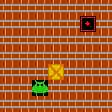

In [3]:
alg_version = 0
alg_env = ALGEnv(dim_room=dim_room, num_boxes=num_boxes, train_mode=train_mode,
                 alg_version=alg_version, agent_lb_path=agent_lb_path, agent_ub_path=agent_ub_path, init_probs=init_probs)
alg_demo = ALGDemoWrapper(alg_env, alg_path=alg_path, alg_version=alg_version)
succeeded, generated_map = alg_demo.generate_episode_gif()
if succeeded:
    display(Image(filename='temp/alg_episode_v{}.gif'.format(alg_version), width=200, height=200))

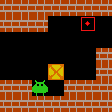

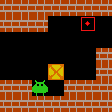

In [4]:
agent_demo_ub.generate_episode_gif(generated_map)
display(Image(filename='temp/agent_episode.gif'.format(alg_version), width=200, height=200))
agent_demo_lb.generate_episode_gif(generated_map)
display(Image(filename='temp/agent_episode.gif'.format(alg_version), width=200, height=200))

### v1 generation and agents solving attempts

loaded ../demo_checkpoints/agent_v1b_1 as ub


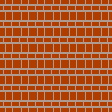

In [5]:
alg_version = 1
alg_env = ALGEnv(dim_room=dim_room, num_boxes=num_boxes, train_mode=train_mode,
                 alg_version=alg_version, agent_lb_path=agent_lb_path, agent_ub_path=agent_ub_path, init_probs=init_probs)
alg_demo = ALGDemoWrapper(alg_env, alg_path=alg_path, alg_version=alg_version)
succeeded, generated_map = alg_demo.generate_episode_gif()
if succeeded:
    display(Image(filename='temp/alg_episode_v{}.gif'.format(alg_version), width=200, height=200))

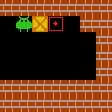

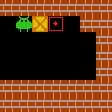

In [6]:
agent_demo_ub.generate_episode_gif(generated_map)
display(Image(filename='temp/agent_episode.gif'.format(alg_version), width=200, height=200))
agent_demo_lb.generate_episode_gif(generated_map)
display(Image(filename='temp/agent_episode.gif'.format(alg_version), width=200, height=200))

### v2 generation and agents solving attempts

loaded ../demo_checkpoints/agent_v1b_1 as ub
loaded ../demo_checkpoints/agent_v1b_0 as lb


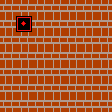

In [7]:
alg_version = 2
alg_env = ALGEnv(dim_room=dim_room, num_boxes=num_boxes, train_mode=train_mode,
                 alg_version=alg_version, agent_lb_path=agent_lb_path, agent_ub_path=agent_ub_path, init_probs=init_probs)
alg_demo = ALGDemoWrapper(alg_env, alg_path=alg_path, alg_version=alg_version)
succeeded, generated_map = alg_demo.generate_episode_gif()
if succeeded:
    display(Image(filename='temp/alg_episode_v{}.gif'.format(alg_version), width=200, height=200))

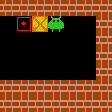

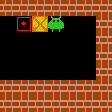

In [21]:
agent_demo_ub.generate_episode_gif(generated_map)
display(Image(filename='temp/agent_episode.gif'.format(alg_version), width=200, height=200))
agent_demo_lb.generate_episode_gif(generated_map)
display(Image(filename='temp/agent_episode.gif'.format(alg_version), width=200, height=200))

# 3. Evaluate agents
Compute the number of levels each agent can solve and the number of levels each agent can uniquely solve (only that agent can solve)

In [9]:
evaluate_agents(version_li=['1b_0', '1b_1'], num_tests=1000, load_dir='../demo_checkpoints')

  0%|          | 4/1000 [00:00<00:31, 31.61it/s]

created soko env


100%|██████████| 1000/1000 [00:33<00:00, 29.76it/s]

1b_0 solved 405, uniquely solved 74
1b_1 solved 471, uniquely solved 140


# 4. Evaluate different versions of ALGs
Compute the success generation rate of each version of ALG checkpoints

In [22]:
evaluate_agents(version_li=['1b_0', '1b_1'], num_tests=1000, load_dir='../demo_checkpoints', alg_path=alg_path, alg_version=0)

  0%|          | 2/1000 [00:00<01:09, 14.26it/s]

created soko env


100%|██████████| 1000/1000 [00:47<00:00, 21.14it/s]

1b_0 solved 15, uniquely solved 13
1b_1 solved 2, uniquely solved 0


In [23]:
evaluate_agents(version_li=['1b_0', '1b_1'], num_tests=1000, load_dir='../demo_checkpoints', alg_path=alg_path, alg_version=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

created soko env


100%|██████████| 1000/1000 [00:43<00:00, 22.78it/s]

1b_0 solved 14, uniquely solved 2
1b_1 solved 203, uniquely solved 191


In [24]:
evaluate_agents(version_li=['1b_0', '1b_1'], num_tests=1000, load_dir='../demo_checkpoints', alg_path=alg_path, alg_version=2)

  0%|          | 0/1000 [00:00<?, ?it/s]

created soko env


100%|██████████| 1000/1000 [00:48<00:00, 20.41it/s]

1b_0 solved 9, uniquely solved 6
1b_1 solved 209, uniquely solved 206
